In [43]:
import pandas as pd
from rdkit.Chem.rdChemReactions import ReactionFromSmarts
import json
from rdkit import Chem
from rdkit.Chem import Draw

In [181]:
with open('/Users/kate_fieseler/PycharmProjects/syndirella/syndirella/constants/RXN_SMARTS_CONSTANTS.json', 'r') as f:
    rxn_smarts = json.load(f)

In [45]:
df = pd.read_csv('warren_designs_27_feb.csv')
df

,target-names,no-steps,concentration-required-mM,amount-required-uL,batch-tag,reactant-1-1,reactant-2-1,reaction-product-smiles-1,reaction-name-1,reaction-recipe-1,...,reaction-product-smiles-3,reaction-name-3,reaction-recipe-3,reaction-groupby-column-3,reactant-1-4,reactant-2-4,reaction-product-smiles-4,reaction-name-4,reaction-recipe-4,reaction-groupby-column-4
0,x0310-x0416-merge-1-1,3,100.0,40.0,wasgo-2.0,Cn1ncc(NC(=O)OC(C)(C)C)c1N,O=C(O)C1CCCO1,product-1,Amidation,standard,...,product-3,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN
1,x0310-x0416-merge-2-1,3,100.0,40.0,wasgo-2.0,CC(C)(C)OC(=O)Nc1cccc(N)c1,O=C(O)C1CCCO1,product-1,Amidation,standard,...,product-3,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN
2,x0310-x0416-merge-2-2,3,100.0,40.0,wasgo-2.0,CC(C)(C)OC(=O)Nc1cc(N)c(C)cc1,O=C(O)C1CCCO1,product-1,Amidation,standard,...,product-3,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN
3,x0310-x0416-merge-2-3,3,100.0,40.0,wasgo-2.0,Nc1cc(NC(=O)OC(C)(C)C)ccn1,O=C(O)C1CCCO1,product-1,Amidation,standard,...,product-3,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN
4,x0310-x0416-merge-2-4,3,100.0,40.0,wasgo-2.0,CC(C)(C)OC(=O)Nc1cc(N)ccc1C,O=C(O)C1CCCO1,product-1,Amidation,standard,...,product-3,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,x0884-x0739-merge-3-8,2,100.0,40.0,wasgo-2.0,Nc1cc(O)c(C)cc1,CC(=O)O,product-1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,x0884-x0739-merge-3-9,2,100.0,40.0,wasgo-2.0,Nc1cc(O)c(C)cc1C,CC(=O)O,product-1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,x0884-x0739-merge-3-10,2,100.0,40.0,wasgo-2.0,Nc1cncc(O)c1,CC(=O)O,product-1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,x0884-x0739-merge-3-11,2,100.0,40.0,wasgo-2.0,Nc1ccnc(O)c1,CC(=O)O,product-1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


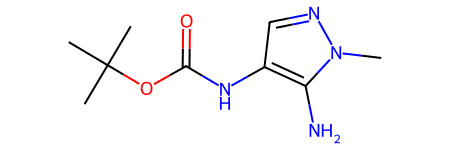

In [46]:
r1 = Chem.MolFromSmiles(df.iloc[0]['reactant-1-1'])
r1

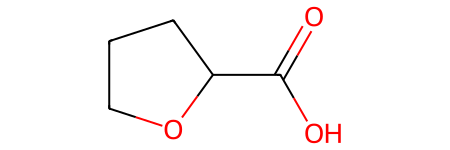

In [47]:
r2 = Chem.MolFromSmiles(df.iloc[0]['reactant-2-1'])
r2

In [48]:
amidation = ReactionFromSmarts(rxn_smarts['Amidation'])

In [49]:
products = amidation.RunReactants([r2, r1])
products

((<rdkit.Chem.rdchem.Mol at 0x12d663b30>,),)

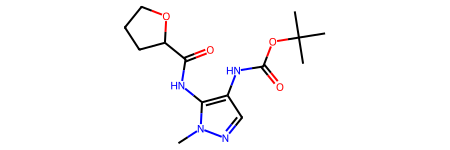

In [50]:
product = products[0][0]
product

In [51]:
n_boc_deprotection = ReactionFromSmarts(rxn_smarts['N-Boc_deprotection'])


In [52]:
products = n_boc_deprotection.RunReactants([product])
products

((<rdkit.Chem.rdchem.Mol at 0x13fa5f660>,),
 (<rdkit.Chem.rdchem.Mol at 0x13fb0e190>,),
 (<rdkit.Chem.rdchem.Mol at 0x14f065f90>,),
 (<rdkit.Chem.rdchem.Mol at 0x14f045a50>,),
 (<rdkit.Chem.rdchem.Mol at 0x14f045740>,),
 (<rdkit.Chem.rdchem.Mol at 0x14f045200>,))

In [53]:
# show all the products
product_list = []
for i in range(len(products)):
    product_list.append(products[i][0])
product_list

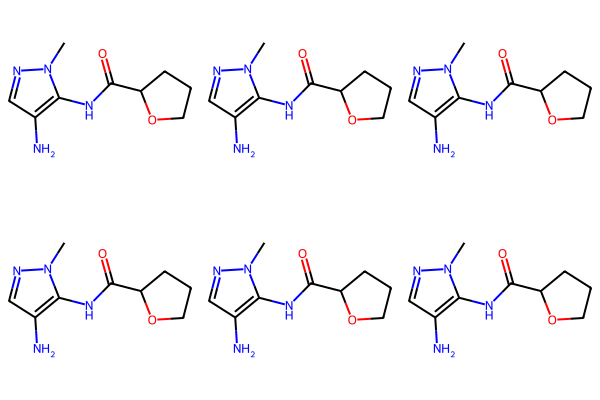

In [54]:
Draw.MolsToGridImage(product_list, molsPerRow=3, subImgSize=(200, 200))

In [134]:
williamson_ether = ReactionFromSmarts(rxn_smarts['Williamson_ether_synthesis'])

# Populate first product

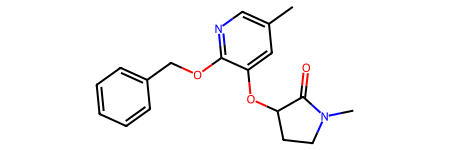

In [136]:
# get reactants, print out reactants and first product
rows = range(39,44)
for row in rows:
    r1 = Chem.MolFromSmiles(df.iloc[row]['reactant-1-1'])
    r2 = Chem.MolFromSmiles(df.iloc[row]['reactant-2-1'])
    Draw.MolsToGridImage([r1, r2], molsPerRow=3, subImgSize=(200, 200), legends=['r1', 'r2'])
    if df.iloc[row]['reaction-name-1'] == 'Williamson ether':
        products = williamson_ether.RunReactants([r2, r1])
        product = products[0][0]
        df.loc[row, 'reaction-product-smiles-1'] = Chem.MolToSmiles(product)
product

In [138]:
df.to_pickle('warren_designs_27_feb.pkl')

# Populate second product

In [204]:
df = pd.read_pickle('warren_designs_27_feb.pkl')
df

,target-names,no-steps,concentration-required-mM,amount-required-uL,batch-tag,reactant-1-1,reactant-2-1,reaction-product-smiles-1,reaction-name-1,reaction-recipe-1,...,reaction-name-3,reaction-recipe-3,reaction-groupby-column-3,reactant-1-4,reactant-2-4,reaction-product-smiles-4,reaction-name-4,reaction-recipe-4,reaction-groupby-column-4,product-1
0,x0310-x0416-merge-1-1,3,100.0,40.0,wasgo-2.0,Cn1ncc(NC(=O)OC(C)(C)C)c1N,O=C(O)C1CCCO1,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
1,x0310-x0416-merge-2-1,3,100.0,40.0,wasgo-2.0,CC(C)(C)OC(=O)Nc1cccc(N)c1,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
2,x0310-x0416-merge-2-2,3,100.0,40.0,wasgo-2.0,CC(C)(C)OC(=O)Nc1cc(N)c(C)cc1,O=C(O)C1CCCO1,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCCO1,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
3,x0310-x0416-merge-2-3,3,100.0,40.0,wasgo-2.0,Nc1cc(NC(=O)OC(C)(C)C)ccn1,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
4,x0310-x0416-merge-2-4,3,100.0,40.0,wasgo-2.0,CC(C)(C)OC(=O)Nc1cc(N)ccc1C,O=C(O)C1CCCO1,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)OC(C)(C)C,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,x0884-x0739-merge-3-8,2,100.0,40.0,wasgo-2.0,Nc1cc(O)c(C)cc1,CC(=O)O,CC(=O)Nc1ccc(C)c(O)c1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
81,x0884-x0739-merge-3-9,2,100.0,40.0,wasgo-2.0,Nc1cc(O)c(C)cc1C,CC(=O)O,CC(=O)Nc1cc(O)c(C)cc1C,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
82,x0884-x0739-merge-3-10,2,100.0,40.0,wasgo-2.0,Nc1cncc(O)c1,CC(=O)O,CC(=O)Nc1cncc(O)c1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
83,x0884-x0739-merge-3-11,2,100.0,40.0,wasgo-2.0,Nc1ccnc(O)c1,CC(=O)O,CC(=O)Nc1ccnc(O)c1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1


In [205]:
# populate 'reactant-1-2' column with smiles from 'reaction-product-smiles-1' column if not NaN already
for row in range(0,len(df)):
    if df.iloc[row]['reactant-1-4'] == 'product-3':
        df.loc[row, 'reactant-1-4'] = df.iloc[row]['reaction-product-smiles-3']

CC(=O)Nc1cccc(O)c1NC(=O)CO


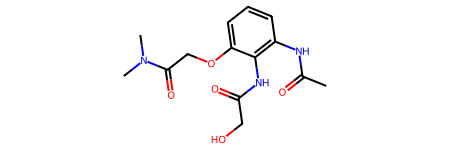

In [209]:
# get reactants, print out reactants and first product
reaction = ReactionFromSmarts(rxn_smarts['Williamson_ether_synthesis'])
for row in rows:
    if df.iloc[row]['reaction-name-4'] == 'Williamson ether':
        r1 = Chem.MolFromSmiles(df.iloc[row]['reactant-1-4'])
        print(df.iloc[row]['reactant-1-4'])
        r2 = Chem.MolFromSmiles(df.iloc[row]['reactant-2-4'])
        products = reaction.RunReactants([r2,r1])
        product = products[0][0]
        df.loc[row, 'reaction-product-smiles-4'] = Chem.MolToSmiles(product)
product

In [210]:
df

,target-names,no-steps,concentration-required-mM,amount-required-uL,batch-tag,reactant-1-1,reactant-2-1,reaction-product-smiles-1,reaction-name-1,reaction-recipe-1,...,reaction-name-3,reaction-recipe-3,reaction-groupby-column-3,reactant-1-4,reactant-2-4,reaction-product-smiles-4,reaction-name-4,reaction-recipe-4,reaction-groupby-column-4,product-1
0,x0310-x0416-merge-1-1,3,100.0,40.0,wasgo-2.0,Cn1ncc(NC(=O)OC(C)(C)C)c1N,O=C(O)C1CCCO1,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
1,x0310-x0416-merge-2-1,3,100.0,40.0,wasgo-2.0,CC(C)(C)OC(=O)Nc1cccc(N)c1,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1cccc(NC(=O)C2CCCO2)c1,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
2,x0310-x0416-merge-2-2,3,100.0,40.0,wasgo-2.0,CC(C)(C)OC(=O)Nc1cc(N)c(C)cc1,O=C(O)C1CCCO1,Cc1ccc(NC(=O)OC(C)(C)C)cc1NC(=O)C1CCCO1,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
3,x0310-x0416-merge-2-3,3,100.0,40.0,wasgo-2.0,Nc1cc(NC(=O)OC(C)(C)C)ccn1,O=C(O)C1CCCO1,CC(C)(C)OC(=O)Nc1ccnc(NC(=O)C2CCCO2)c1,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
4,x0310-x0416-merge-2-4,3,100.0,40.0,wasgo-2.0,CC(C)(C)OC(=O)Nc1cc(N)ccc1C,O=C(O)C1CCCO1,Cc1ccc(NC(=O)C2CCCO2)cc1NC(=O)OC(C)(C)C,Amidation,standard,...,Amidation,standard,True,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,x0884-x0739-merge-3-8,2,100.0,40.0,wasgo-2.0,Nc1cc(O)c(C)cc1,CC(=O)O,CC(=O)Nc1ccc(C)c(O)c1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
81,x0884-x0739-merge-3-9,2,100.0,40.0,wasgo-2.0,Nc1cc(O)c(C)cc1C,CC(=O)O,CC(=O)Nc1cc(O)c(C)cc1C,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
82,x0884-x0739-merge-3-10,2,100.0,40.0,wasgo-2.0,Nc1cncc(O)c1,CC(=O)O,CC(=O)Nc1cncc(O)c1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1
83,x0884-x0739-merge-3-11,2,100.0,40.0,wasgo-2.0,Nc1ccnc(O)c1,CC(=O)O,CC(=O)Nc1ccnc(O)c1,Amidation,standard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cn1ncc(NC(=O)OC(C)(C)C)c1NC(=O)C1CCCO1


In [212]:
df.to_pickle('warren_designs_27_feb.pkl')
df.to_csv('warren_designs_27_feb.csv')

# Looking Manually

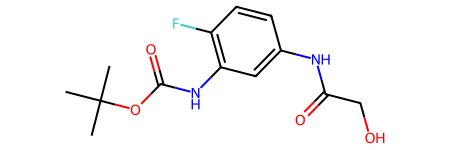

In [109]:
# check if reaction is amidation
if df.iloc[row]['reaction-name-1'] == 'Amidation':
    products = amidation.RunReactants([r2, r1])
    product = products[0][0]
product

In [110]:
df.loc[row, 'reaction-product-smiles-1'] = Chem.MolToSmiles(product)
df.loc[row,:]

target-names                                  x0310-x0732-merge-2-6
no-steps                                                          3
concentration-required-mM                                     100.0
amount-required-uL                                             40.0
batch-tag                                                 wasgo-2.0
reactant-1-1                            CC(C)(C)OC(=O)Nc1cc(N)ccc1F
reactant-2-1                                               O=C(O)CO
reaction-product-smiles-1        CC(C)(C)OC(=O)Nc1cc(NC(=O)CO)ccc1F
reaction-name-1                                           Amidation
reaction-recipe-1                                          standard
reaction-groupby-column-1                                      True
reactant-1-2                                              product-1
reactant-2-2                                                    NaN
reaction-product-smiles-2                                 product-2
reaction-name-2                                 